In [1]:
from RuleTree.tree.RuleTreeClassifier import RuleTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import itertools
import pandas as pd
import numpy as np
from RuleTree.stumps.instance_stumps import * 

In [2]:
pt_stump = pt_stump_call()
obl_pt_stump = obl_pt_stump_call()
proximity_stump = multi_pt_stump_call()
oblique_proximity_stump = multi_obl_pt_stump_call()

### GunPoint TimeSeries

In [3]:
df_train = pd.read_csv('datasets/split_datasets/mstz_GunPoint_train.csv')
df_test = pd.read_csv('datasets/split_datasets/mstz_GunPoint_test.csv')

In [4]:
X_train = df_train.drop(columns = ['label']).values
y_train = np.array(df_train.label)

In [5]:
X_sampled = X_train
y_sampled = y_train

In [9]:
# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=4, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[pt_stump])
clf.fit(X_sampled, y_sampled)

In [11]:
clf.print_rules(clf.get_rules())

|--- P_10 <= 6.237	50
|   |--- P_5 <= 1.34	20
|   |    output: 1
|   |--- P_5 > 1.34
|   |    output: 0
|--- P_10 > 6.237
|   |--- P_41 <= 6.683	30
|   |   |--- P_16 <= 0.86	6
|   |   |    output: 1
|   |   |--- P_16 > 0.86
|   |   |    output: 0
|   |--- P_41 > 6.683
|   |   |--- P_24 <= 0.912	24
|   |   |    output: 0
|   |   |--- P_24 > 0.912
|   |   |    output: 1


In [12]:
pivots_sampled = [10,5,41,16,24]
pivot_indexes = pivots_sampled

In [13]:
y_train[[pivot_indexes]]

array([[0, 1, 0, 1, 0]])

In [21]:
# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=4, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[proximity_stump], prune_useless_leaves=True)
clf.fit(X_sampled, y_sampled)

In [22]:
clf.print_rules(clf.get_rules())


|--- closer to 27 	50
|   |--- closer to 27 	30
|   |   |--- closer to 27 	21
|   |   |   |--- closer to 29 	5
|   |   |   |    output: 0
|   |   |   |--- closer to 23
|   |   |   |    output: 1
|   |   |--- closer to 38
|   |   |   |--- closer to 27 	16
|   |   |   |    output: 0
|   |   |   |--- closer to 6
|   |   |   |    output: 1
|   |--- closer to 19
|   |    output: 1
|--- closer to 40
|   |--- closer to 3 	20
|   |   |--- closer to 48 	10
|   |   |    output: 0
|   |   |--- closer to 5
|   |   |    output: 1
|   |--- closer to 1
|   |   |--- closer to 2 	10
|   |   |   |--- closer to 2 	3
|   |   |   |    output: 0
|   |   |   |--- closer to 40
|   |   |   |    output: 1
|   |   |--- closer to 1
|   |   |    output: 1


In [28]:
pivots_sampled = [27,19,29,23,38,40,3,48,1,2]
pivot_indexes = pivots_sampled

In [29]:
y_train[[pivot_indexes]]

array([[0, 1, 0, 1, 1, 1, 0, 0, 1, 0]])

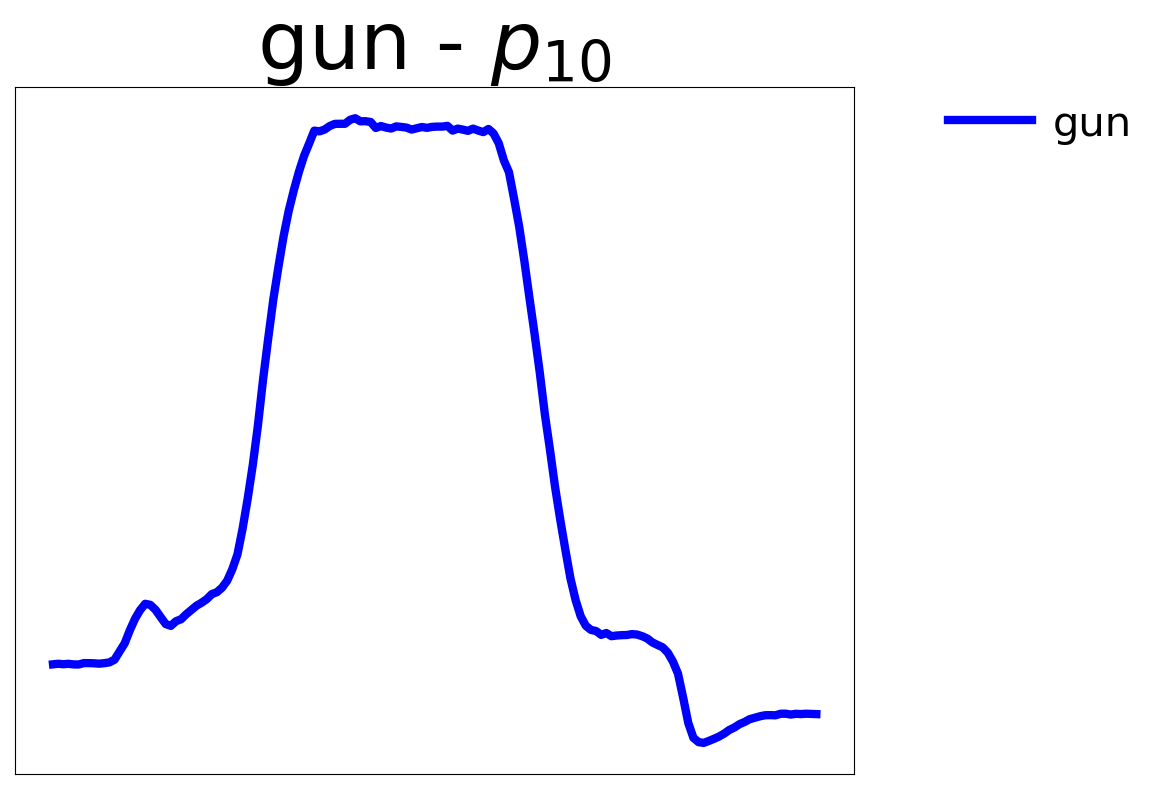

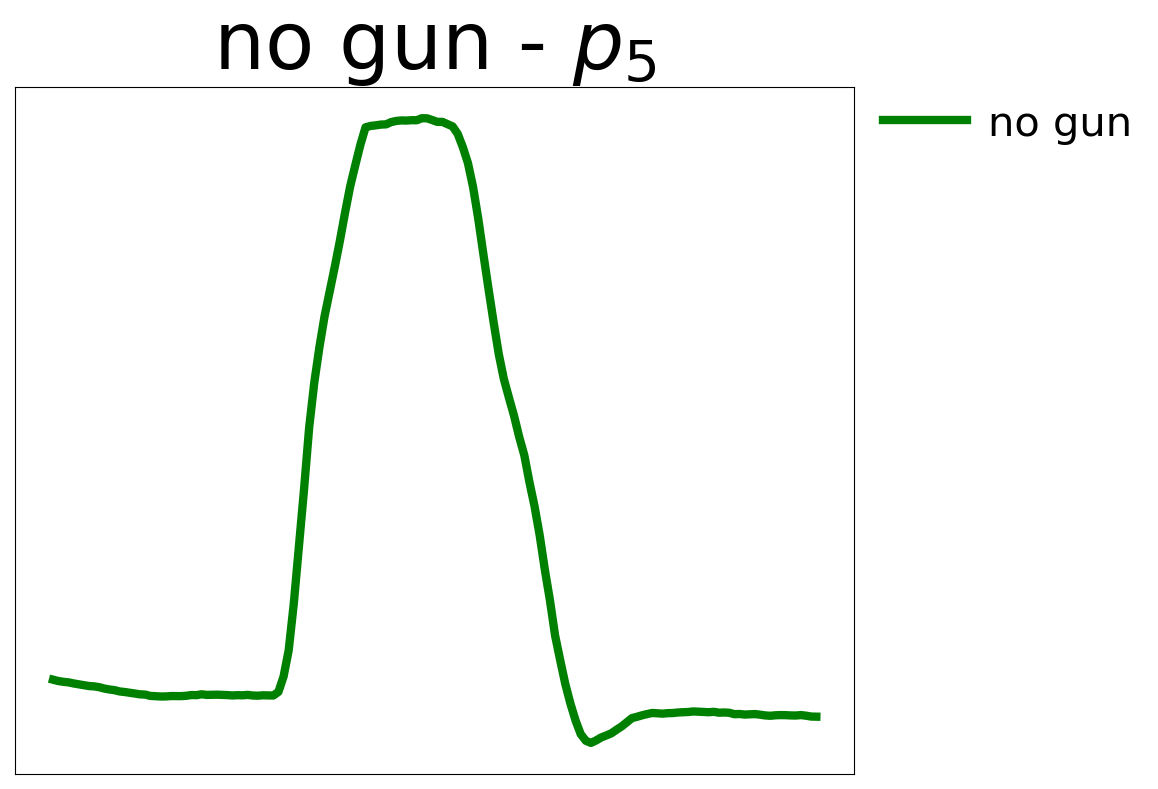

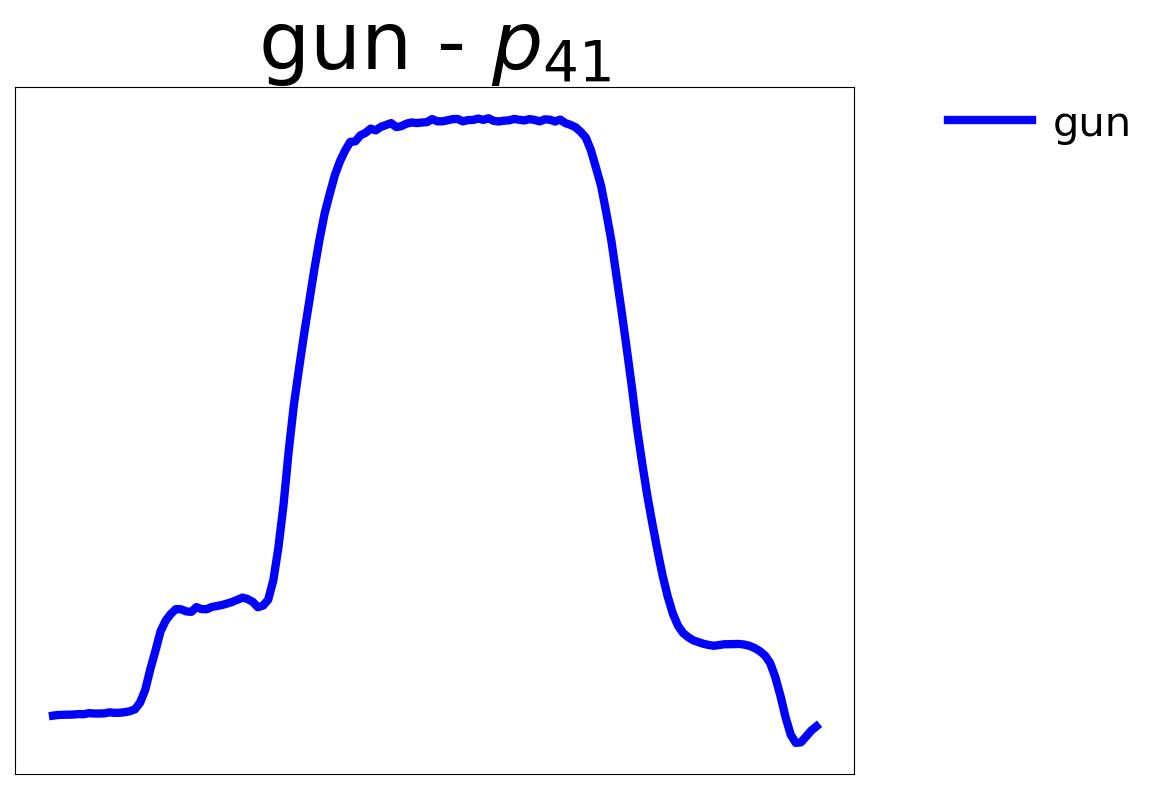

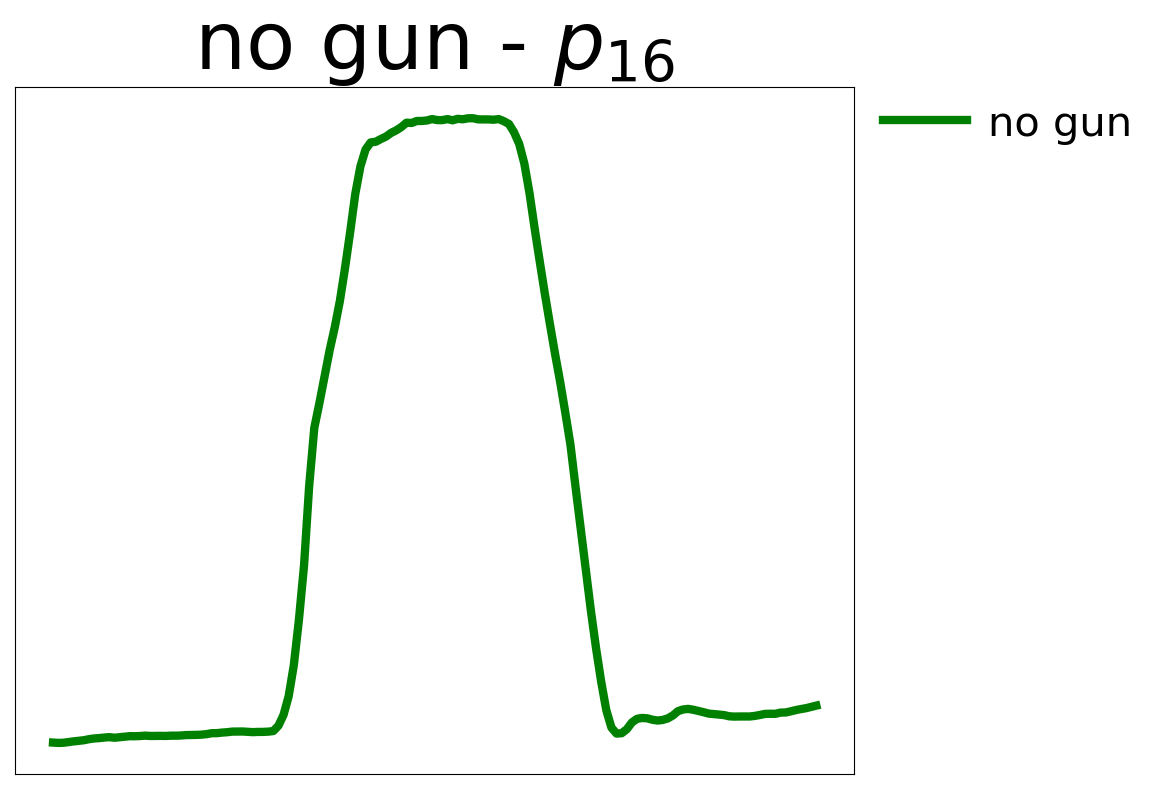

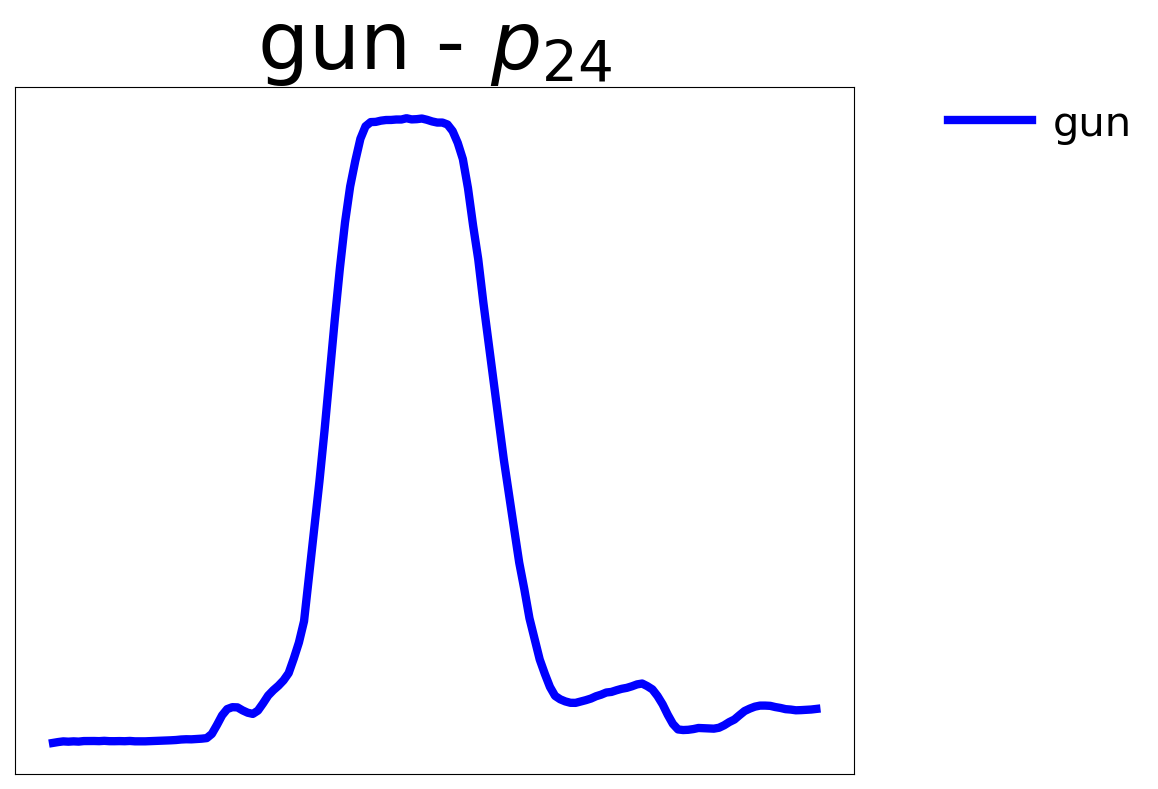

In [16]:
import os

label_dict = {1: 'no gun', 0: 'gun'}

for ind in pivots_sampled:
    ts = df_train.drop(columns=['label']).iloc[ind].values
    label = int(df_train.iloc[ind].label)

    color = 'green' if label == 1 else 'blue'

    plt.figure(figsize=(12, 8))
    title = f'{label_dict[label]} - $p_{{{ind}}}$'
    plt.title(title, fontsize=58)

    plt.plot(ts, color=color, linewidth=6, label=label_dict[label])

    # Remove ticks
    plt.xticks([])
    plt.yticks([])

    # Add legend
    legend = plt.legend(
        loc='upper right',
        bbox_to_anchor=(1.35, 1),
        fontsize=30,
        frameon=False,
        handletextpad=0.5,
        borderaxespad=0
    )

    # Left-align the legend text
    for text in legend.get_texts():
        text.set_ha('left')

    plt.tight_layout()
    save_path = os.path.join('', f"pivot_{ind}_{label_dict[label]}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.1)  # High-quality save
    plt.show()
    

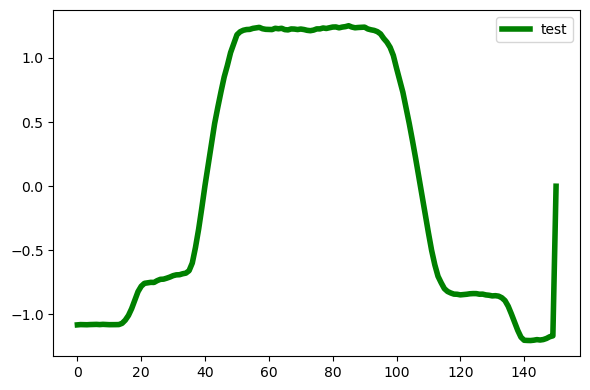

In [32]:
ind = 27
df_train.iloc[ind]

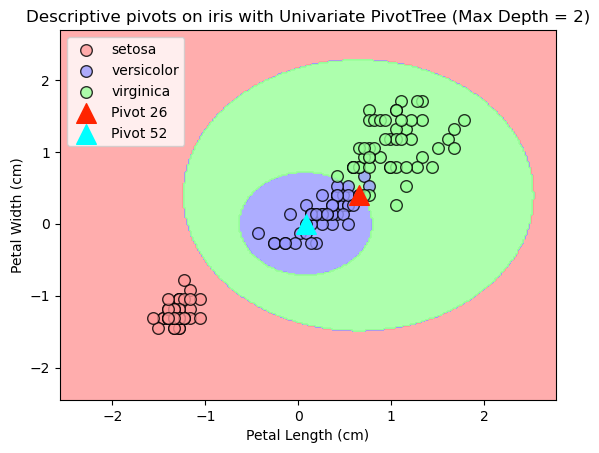

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# Parameters
n_classes = 3
plot_step = 0.02

# Load data
iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Use soft red, soft blue, and soft green for area colors
area_colors = ['#ff9999', '#9999ff', '#99ff99']

label_cmap = ListedColormap(area_colors)  # Use the same colors for labels and areas

# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=2, 
                         random_state=1,
                         distance_measure='euclidean',
                         base_stumps=[pt_stump])
clf.fit(X, y)

# Plot the decision boundary with soft area colors
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=label_cmap, alpha=0.8)

# Plot the training points with soft area colors
for i, color in zip(range(n_classes), area_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=label_cmap,
                edgecolors='k', s=70, alpha=0.8)

# Highlight sample 26 and sample 50 with stars


plt.scatter(X[91, 0], X[91, 1], c='#FF2400', marker='^', s=200, label='Pivot 26')
plt.scatter(X[149, 0], X[149, 1], c='#00FFFF', marker='^', s=200, label='Pivot 52')
#plt.scatter(X[17, 0], X[17, 1], c='#32CD32', marker='^', s=200, label='Pivot 17')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Descriptive pivots on iris with Univariate PivotTree (Max Depth = 2)')
plt.legend()
plt.show()


In [72]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
#ALBERO DECISIONALE PER REGOLE CON DISTANZA EUCLIDEA DAL PIVO DI INDICE P_

clf.print_rules(clf.get_rules())

|--- P_91 <= 1.884	150
|   |--- P_149 <= 0.718	100
|   |    output: 1
|   |--- P_149 > 0.718
|   |    output: 2
|--- P_91 > 1.884
|    output: 0


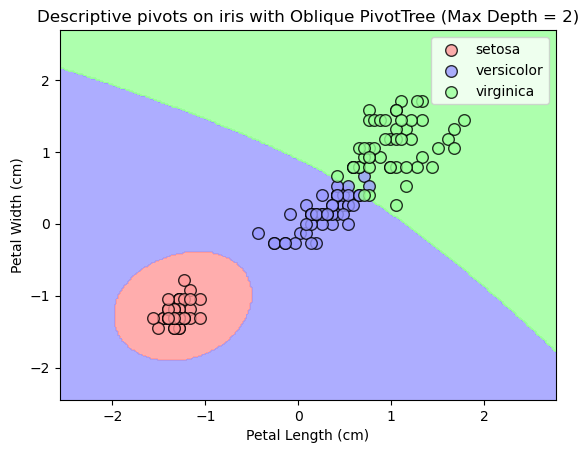

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# Parameters
n_classes = 3
plot_step = 0.02

# Load data
iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Use soft red, soft blue, and soft green for area colors
area_colors = ['#ff9999', '#9999ff', '#99ff99']

label_cmap = ListedColormap(area_colors)  # Use the same colors for labels and areas

# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=2, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[obl_pt_stump])
clf.fit(X, y)

# Plot the decision boundary with soft area colors
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=label_cmap, alpha=0.8)

# Plot the training points with soft area colors
for i, color in zip(range(n_classes), area_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=label_cmap,
                edgecolors='k', s=70, alpha=0.8)

# Highlight sample 26 and sample 50 with stars


#plt.scatter(X[26, 0], X[26, 1], c='#FF2400', marker='^', s=200, label='Pivot 26')
#plt.scatter(X[52, 0], X[52, 1], c='#00FFFF', marker='^', s=200, label='Pivot 52')
#plt.scatter(X[17, 0], X[17, 1], c='#32CD32', marker='^', s=200, label='Pivot 17')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Descriptive pivots on iris with Oblique PivotTree (Max Depth = 2)')
plt.legend()
plt.show()


In [55]:
#ALBERO DECISIONALE PER REGOLE CON DISTANZA EUCLIDEA DAL PIVO DI INDICE P_

clf.print_rules(clf.get_rules())

|--- -0.258 * P_89 + 0.844 * P_45 <= 2.383	150
|    output: 0
|--- -0.258 * P_89 + 0.844 * P_45 > 2.383
|   |--- -0.33 * P_114 + 0.882 * P_45 <= -0.185	100
|   |    output: 1
|   |--- -0.33 * P_114 + 0.882 * P_45 > -0.185
|   |    output: 2


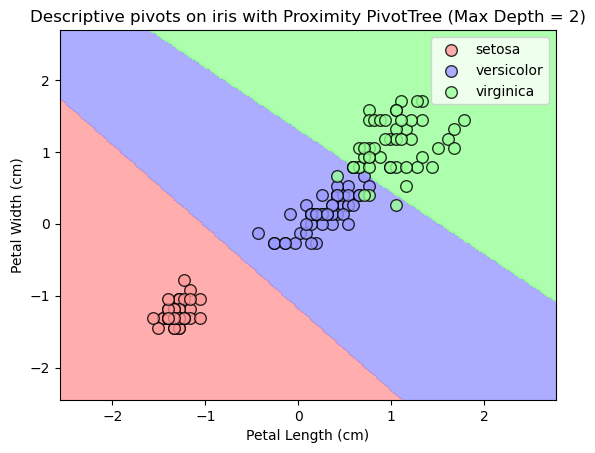

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# Parameters
n_classes = 3
plot_step = 0.02

# Load data
iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Use soft red, soft blue, and soft green for area colors
area_colors = ['#ff9999', '#9999ff', '#99ff99']

label_cmap = ListedColormap(area_colors)  # Use the same colors for labels and areas

# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=2, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[proximity_stump])
clf.fit(X, y)

# Plot the decision boundary with soft area colors
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=label_cmap, alpha=0.8)

# Plot the training points with soft area colors
for i, color in zip(range(n_classes), area_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=label_cmap,
                edgecolors='k', s=70, alpha=0.8)

# Highlight sample 26 and sample 50 with stars


#plt.scatter(X[26, 0], X[26, 1], c='#FF2400', marker='^', s=200, label='Pivot 26')
#plt.scatter(X[52, 0], X[52, 1], c='#00FFFF', marker='^', s=200, label='Pivot 52')
#plt.scatter(X[17, 0], X[17, 1], c='#32CD32', marker='^', s=200, label='Pivot 17')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Descriptive pivots on iris with Proximity PivotTree (Max Depth = 2)')
plt.legend()
plt.show()


In [57]:
#ALBERO DECISIONALE PER REGOLE CON DISTANZA EUCLIDEA DAL PIVO DI INDICE P_

clf.print_rules(clf.get_rules())

|--- closer to 93 	150
|    output: 0
|--- closer to 35
|   |--- closer to 35 	100
|   |    output: 1
|   |--- closer to 4
|   |    output: 2
